# Logistic Regression Calssifier Example

## The Logistic Function
The logistic function is given by: $$T(x) = \frac{1}{1 + e^{-x}}\\[2ex]$$ which we can use to map input values between $(-\infty, +\infty)$ into the output values $(0, 1)$. This will let us map from a linear model (which has all the real numbers as a domain) into probability values which must remain in between $[0, 1]$. (If you know about this, there is a slight mismatch; the logistic cannot really get the endpoints $0$ and $1$. But we can ignore this.)

This is easily implemented as an R function:

In [1]:
# The Logistic Transformation

T <- function(x){
    return(1/(1 + exp(-x)))
}

x	T(x)	
-50	1.92875e-22	
-10	4.539787e-05	
-1	0.2689414	
0.5	0.6224593	
0	0.5	
0.5	0.6224593	
1	0.7310586	
10	0.9999546	
50	1	


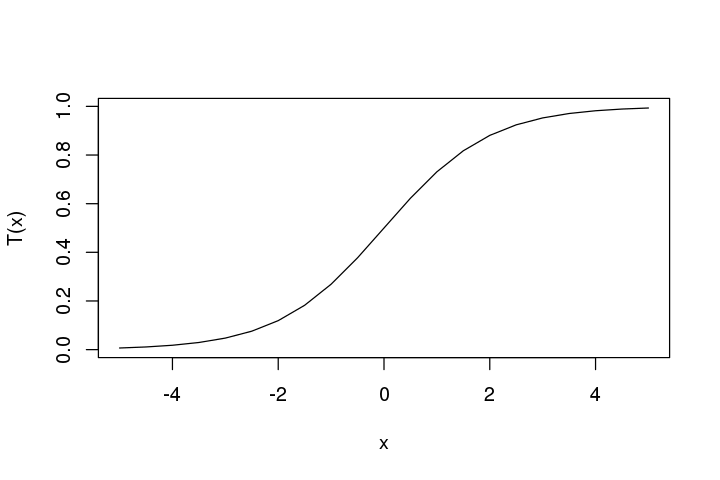

In [2]:
# Check T

cat("x", "T(x)", "\n", sep = "\t")
for(x in c(-50, -10, -1, 0.5, 0, 0.5, 1, 10, 50)){
    cat(x, T(x), "\n", sep="\t")
}

options(repr.plot.width = 6, repr.plot.height = 4) 
x <- seq(-5, 5, by = 0.5)
plot(x, T(x), type = "l")

## Functions to Implement the Model
Now we need two functions: one to fit the model given the values of the parameters and another to update the values of the parameters based on **gradient descent**. We will not go into the details of gradient descent here, but it is a standard method to iteratively approximate parameters in models.

In [3]:
# Update Rule

update_params_componentwise <- function(b_old, y, x, p, alpha=0.3){
    return(b_old + alpha*(y - p)*p*(1 - p)*x)
}

update_params <- function(b0, b1, b2, p, X, Y){
    dims <- dim(X)
    rows <- dims[1]
    for(i in 1:rows){
        b0 <- update_params_componentwise(b0, Y[i], 1, p[i])
        b1 <- update_params_componentwise(b1, Y[i], X[i,1], p[i])
        b2 <- update_params_componentwise(b2, Y[i], X[i,2], p[i])
    }
    return(c(b0, b1, b2))
}

# Fit Rule (for individual components)

fit_logistic_componentwise <- function(b0, b1, b2, x1, x2){
    lin_fit <- b0 + b1*x1 + b2*x2
    return(T(lin_fit))
}

fit_logistic <- function(b0, b1, b2, X){
    dims <- dim(X)
    rows <- dims[1]
    p <- matrix(0, nrow = 10, ncol = 1)
    for(i in 1:rows){
        x1 <- X[i, 1]
        x2 <- X[i, 2]
        p[i] <- fit_logistic_componentwise(b0, b1, b2, x1, x2)
    }
    return(p)
}

This is a test case that is TERRIBLE data.

In [4]:
# Some Fake Data

d <- c(0.03437701, 25.72856, 1.48401533, 24.75241, 3.72138163, 22.98528, 4.51758485, 22.45617, 
       5.56261983, 20.11687, 6.47946624, 18.88082, 11.1226251, 18.56754, 11.6972627, 13.76606, 
       11.9634313, 12.19910, 14.2042439, 11.97358)
X <- matrix(d, nrow = 10, byrow = TRUE)
X

Y <- matrix(c(rep(1, 5), rep(0, 5)), nrow=10)
Y

0.03437701,25.72856
1.48401533,24.75241
3.72138163,22.98528
4.51758485,22.45617
5.56261983,20.11687
6.47946624,18.88082
11.12262510,18.56754
11.69726270,13.76606
11.96343130,12.19910
14.20424390,11.97358


1
1
1
1
1
0
0
0
0
0


In [5]:
fit_logistic(0.5, 0.5, 0.5, X)

0.9999985
0.9999988
0.9999990
0.9999992
0.9999984
0.9999981
0.9999998
0.9999982
0.9999966
0.9999987


## Fit the Model to the Data
This is the actual model fitting...

In [6]:
# Initialize Coefficients

b0 = 0.6
b1 = 0.5
b2 = 0.4

# Do 100 epochs of adjustment...

for(t in 1:100){
    p = fit_logistic(b0, b1, b2, X)
    b = update_params(b0, b1, b2, p, X, Y)
    b0 = b[1]
    b1 = b[2]
    b2 = b[3]
}

# Print final coefficients and estimates of the p for each point

cat(b0, b1, b2, "\n", sep=", ")
fit_logistic(b[1], b[2], b[3], X)  # predictons

0.5987919, 0.4876176, 0.381855, 


0.9999708
0.9999791
0.9999862
0.9999885
0.9999832
0.9999828
0.9999980
0.9999905
0.9999847
0.9999944


In [7]:
fit_logistic(b[1], b[2], b[3], X)  # predictons

0.9999708
0.9999791
0.9999862
0.9999885
0.9999832
0.9999828
0.9999980
0.9999905
0.9999847
0.9999944


In [8]:
# New Data:

t <- c(2.7810836, 2.550537003, 0, 1.46548937, 2.362125076, 0, 3.396561688, 4.400293529, 0,
       1.3880701, 1.850220317, 0, 3.06407232, 3.005305973, 0, 7.627531214, 2.759262235, 1,
       5.3324412, 2.088626775, 1, 6.92259671, 1.77106367,  1, 8.675418651, -0.24206865, 1,
       7.6737564, 3.508563011, 1)

D <- data.frame(matrix(t, nrow = 10, byrow = TRUE))
names(D) <- c("X1", "X2", "Y")
D

X <- as.matrix(D[1:2])
X

Y <- as.matrix(D[3])
Y

X1,X2,Y
2.781084,2.5505370,0
1.465489,2.3621251,0
3.396562,4.4002935,0
1.388070,1.8502203,0
3.064072,3.0053060,0
7.627531,2.7592622,1
5.332441,2.0886268,1
6.922597,1.7710637,1
8.675419,-0.2420686,1
7.673756,3.5085630,1


X1,X2
2.781084,2.5505370
1.465489,2.3621251
3.396562,4.4002935
1.388070,1.8502203
3.064072,3.0053060
7.627531,2.7592622
5.332441,2.0886268
6.922597,1.7710637
8.675419,-0.2420686
7.673756,3.5085630


Y
0
0
0
0
0
1
1
1
1
1


In [9]:
# Run process again on BETTER data!

# Initialize Coefficients

b0 = 1/2
b1 = 1/2
b2 = 1/2

# Do 100 epochs of adjustment...

for(t in 1:100){
    p = fit_logistic(b0, b1, b2, X)
    b = update_params(b0, b1, b2, p, X, Y)
    b0 = b[1]
    b1 = b[2]
    b2 = b[3]
}

# Print final coefficients and estimates of the p for each point

cat(b0, b1, b2, "\n", sep=", ")
fit_logistic(b[1], b[2], b[3], X)  # predictons

-0.5887995, 1.530574, -2.350865, 


0.088821219
0.019863714
0.003221739
0.056579048
0.049075307
0.990038823
0.934796582
0.997108880
0.999998255
0.948254960


In [10]:
predict_logistic <- function(b, X){
    p <- fit_logistic(b[1], b[2], b[3], X)
    pp <- ifelse(p >= 0.5, 1, 0)
    return(pp)
}

In [11]:
predict_logistic(b, X)

0
0
0
0
0
1
1
1
1
1
